# AI in Finance: Data-Driven Investment Strategies with Python - FIN-1008 - BOS1
# A2: Group Assignment
## **Factors Affecting USA National Home Prices**

## **Exploratory Data Analysis (EDA)**

**Importing Libraries:**

Here we import several libraries essential for data analysis and machine learning.NumPy is used for numerical operations, pandas for data manipulation and Matplotlib's pyplot along with Seaborn for data visualization.
We also imported Scikit-learn's train_test_split for dividing datasets into training and testing sets, and r2_score and mean_squared_error for evaluating regression model performance.

### **Team 9**

1. Yang Gao
2. Komal Ghazanfar
3. Mansi Pathak
4. Han Pham
5. Avinav Sahni
6. Takahiro Sasaki

In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

The code below mounts Google Drive to Google Colab, allowing access to files stored there. We have set the path to a CSV file within Google Drive. The code loads this CSV file into a pandas DataFrame, setting the "DATE" column as the index, and displays the first few rows of the DataFrame. This setup facilitates further analysis of the dataset.








In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

# Correct file path
file_path = '/content/drive/My Drive/AI in Finance/prepared_dataset.csv'

# Load the CSV file into a DataFrame
us_house_price_df = pd.read_csv(file_path).set_index("DATE")

# Display the first few rows of the DataFrame
us_house_price_df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CSUSHPISA,Year,Month,UNRATE,FedFunds,Per_Capita_GDP,CPI,PopulationGrowthRate
DATE,,,,,,,,
1987-01-01,63.964,1987.0,1.0,6.6,6.43,4722.156,111.4,0.893829
1988-01-01,68.858,1988.0,1.0,5.7,6.83,5073.372,116.0,0.907999
1989-01-01,73.946,1989.0,1.0,5.4,9.12,5511.253,121.2,0.944406
1990-01-01,76.897,1990.0,1.0,5.4,8.23,5872.701,127.5,1.129651
1991-01-01,75.915,1991.0,1.0,6.4,6.91,6035.178,134.7,1.336261


## **Data Cleaning**

Now that we can see the first five rows of our dataset, we can proceed to Data Cleaning. Below, we have dropped the "Year" and "Month" columns from the us_house_price_df DataFrame.

In [3]:
# Dropping year and month columns
us_house_price_df.drop(columns = ["Year", "Month"], inplace = True)

This code calculates and displays summary statistics for the us_house_price_df DataFrame. The summary statistics provide a quick overview of the central tendency, dispersion, and range of the data, aiding in the initial understanding and analysis of the dataset.








In [4]:
# Summary statistics
summary_stats = us_house_price_df.describe()
summary_stats

,CSUSHPISA,UNRATE,FedFunds,Per_Capita_GDP,CPI,PopulationGrowthRate
count,36.000000,36.000000,36.000000,36.000000,36.000000,36.000000
mean,135.571417,5.769444,3.129444,12783.230722,191.522444,0.910591
std,55.454402,1.511068,2.718450,5654.706062,47.042945,0.274324
min,63.964000,3.500000,0.070000,4722.156000,111.400000,0.156747
25%,81.481250,4.675000,0.297500,7781.923250,153.650000,0.733540
50%,139.064000,5.600000,2.710000,12345.366500,188.950000,0.926641
75%,174.167250,6.600000,5.470000,16785.576250,232.446000,1.134323
max,285.829000,9.800000,9.120000,25029.116000,282.599000,1.386886


**House Price Index (CSUSHPISA):**

The average house price index is 135.57, with values ranging significantly from 63.96 to 285.83. This suggests substantial variation in house prices, potentially indicating regional differences or market fluctuations over time. A standard deviation of 55.45 further highlights this variability.

**Unemployment Rate (UNRATE):**

The unemployment rate averages at 5.77%. The standard deviation of 1.51% suggests moderate variability, indicating periods of differing economic conditions that could be linked to economic cycles or specific economic events impacting employment.

**Federal Funds Rate (FedFunds):**

With an average rate of 3.13% and a wide range from 0.07% to 9.12%, the federal funds rate shows high variability (standard deviation of 2.72%). This reflects different monetary policy stances over time, likely in response to changing economic conditions, inflation rates, and other macroeconomic factors.

**Per Capita GDP (Per_Capita_GDP):**

The average per capita GDP is 12,783.23, with a high standard deviation of 5,654.71. This indicates significant economic diversity, possibly reflecting different stages of economic development, productivity levels, and income distribution across regions or over time.

**Consumer Price Index (CPI):**

The CPI averages at 191.52 with a standard deviation of 47.04. This variability suggests periods of different inflationary pressures, affecting the cost of living and purchasing power. The range indicates that there have been both low and high inflation periods within the dataset.

**Population Growth Rate:**

The population growth rate averages at 0.91% and a standard deviation of 0.27%. This moderate variability indicates relatively stable population growth, with some fluctuations that could be due to economic opportunities, migration patterns, or policy changes affecting population dynamics.

**Overall Analysis:**

These statistics paint a picture of an economy with significant fluctuations in key indicators over the observed period. The wide ranges and standard deviations in house prices, federal funds rates, and per capita GDP indicate periods of economic expansion and contraction, differing monetary policies, and varying economic prosperity. The more moderate variability in unemployment rates, CPI, and population growth rates suggests some stability in employment and population dynamics, despite changes in other economic conditions.











## **Correlation Analysis:**

Now we will look at the pairwise correlation of columns in the DataFrame. The correlation coefficient ranges from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 indicates no correlation.

In [5]:
# Correlation matrix
corr_matrix = us_house_price_df.corr()
corr_matrix

,CSUSHPISA,UNRATE,FedFunds,Per_Capita_GDP,CPI,PopulationGrowthRate
CSUSHPISA,1.000000,-0.250971,-0.673685,0.957521,0.934890,-0.801698
UNRATE,-0.250971,1.000000,-0.313140,-0.160969,-0.095973,0.040410
FedFunds,-0.673685,-0.313140,1.000000,-0.770299,-0.812384,0.620417
Per_Capita_GDP,0.957521,-0.160969,-0.770299,1.000000,0.991344,-0.828332
CPI,0.934890,-0.095973,-0.812384,0.991344,1.000000,-0.790102
PopulationGrowthRate,-0.801698,0.040410,0.620417,-0.828332,-0.790102,1.000000


Now let's visualize the results in a correlation matrix:

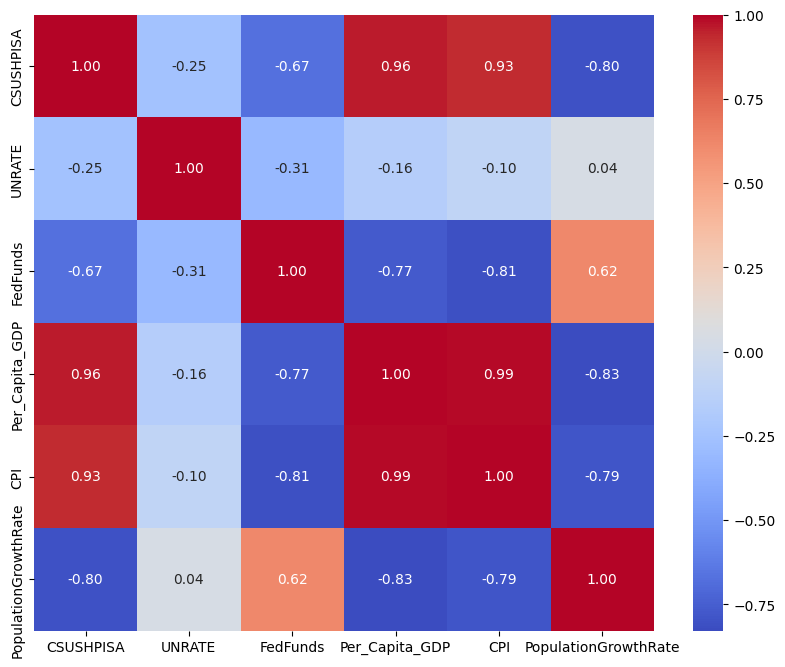

In [6]:
# Visualize correlations using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

The correlation matrix reveals several key relationships between economic indicators. Higher house prices are strongly associated with better economic conditions, such as higher per capita GDP and CPI, but are inversely related to federal funds rates and population growth. Unemployment rates show weak inverse correlations with economic growth indicators. Higher federal funds rates are linked to lower per capita GDP and CPI but correlate positively with population growth. Per capita GDP and CPI exhibit a near-perfect positive correlation, indicating that economic growth drives higher consumer prices. Conversely, higher population growth rates are associated with lower house prices, per capita GDP, and CPI. These findings highlight the intricate interplay between economic variables, offering valuable insights.

## **Time Series Decomposition**

The code below performs time series decomposition and visualizes the components of the House Price Index variable. It uses the seasonal_decompose function to decompose the time series into trend, seasonal, and residual components, assuming an additive model with a period of 12. The decomposed components are then plotted in a 4-panel subplot: the original time series, the trend component, the seasonal component, and the residuals

We also generated  autocorrelation and partial autocorrelation plots using plot_acf and plot_pacf, respectively, to analyze the lagged relationships within the time series. These plots help identify patterns, periodicities, and potential autoregressive processes in the data.

以下のコードは、時系列分解を実行し、住宅価格指数変数のコンポーネントを視覚化します。seasonal_decompose 関数を使用して、時系列をトレンド、季節、残差コンポーネントに分解します。これは、12 の期間の加法モデルを想定しています。分解されたコンポーネントは、元の時系列、トレンド コンポーネント、季節コンポーネント、残差の 4 つのパネル サブプロットにプロットされます。

また、plot_acf と plot_pacf を使用して、自己相関プロットと部分自己相関プロットをそれぞれ生成し、時系列内の遅延関係を分析しました。これらのプロットは、データ内のパターン、周期性、および潜在的な自己回帰プロセスを識別するのに役立ちます。

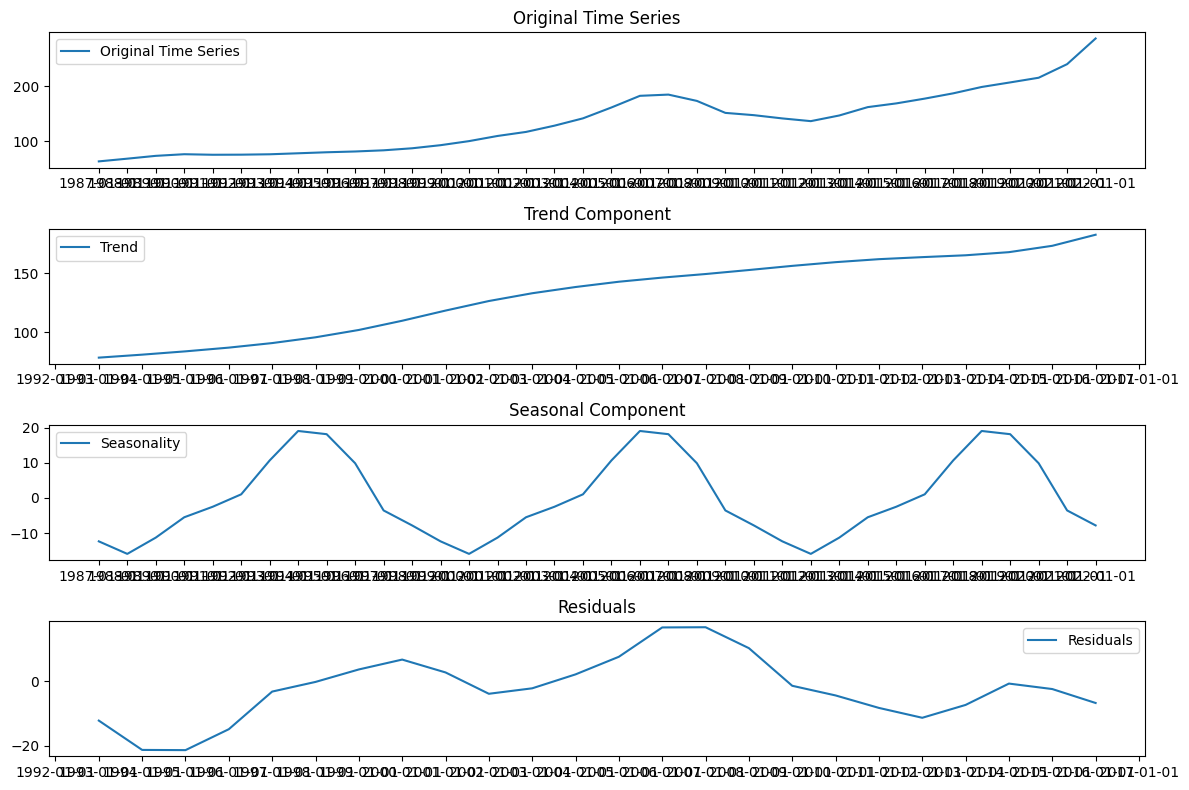

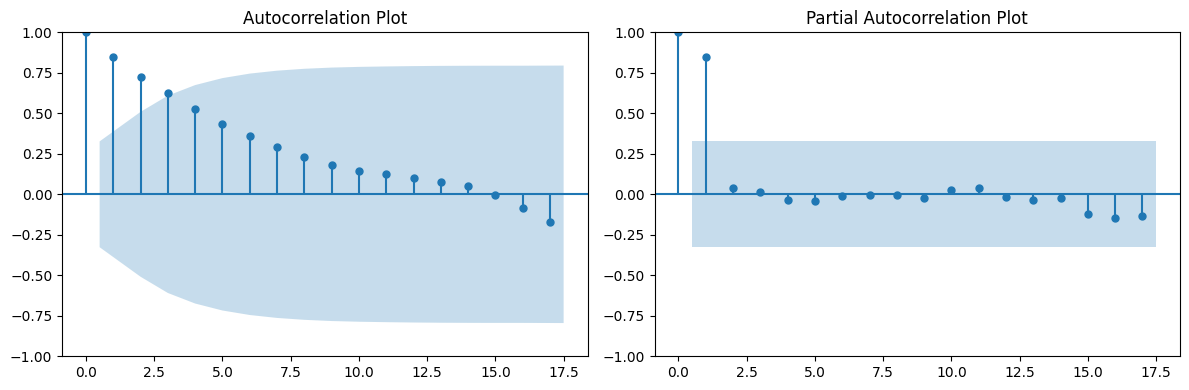

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Time Series Decomposition
decomposition = seasonal_decompose(us_house_price_df['CSUSHPISA'], model='additive', period=12)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot Time Series Components
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(us_house_price_df['CSUSHPISA'], label='Original Time Series')
plt.legend()
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend')
plt.legend()
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonality')
plt.legend()
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residuals')
plt.legend()
plt.title('Residuals')

plt.tight_layout()
plt.show()

# Autocorrelation and Partial Autocorrelation Plots
plt.figure(figsize=(12, 4))

# Autocorrelation Plot
plt.subplot(1, 2, 1)
plot_acf(us_house_price_df['CSUSHPISA'], lags=17, ax=plt.gca(), title='Autocorrelation Plot')

# Partial Autocorrelation Plot
plt.subplot(1, 2, 2)
plot_pacf(us_house_price_df['CSUSHPISA'], lags=17, ax=plt.gca(), title='Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()

**Original Time Series:**

This plot shows the overall house price index over time. There is a noticeable upward trend, indicating that house prices have generally increased over the period. There are also fluctuations that suggest some seasonality and variability.

**Trend Component:**

The trend component reveals the long-term movement in house prices, smoothing out short-term fluctuations. It clearly shows a steady increase over the years, reflecting a long-term growth in house prices. There is a noticeable dip around the mid-2000s, which likely corresponds to the housing market crash during the financial crisis, followed by a recovery and continued growth.

**Seasonal Component:**

The seasonal component shows repeating patterns within each year. This plot captures the cyclical nature of the data, highlighting periods within the year where house prices tend to increase or decrease. The seasonality seems to have consistent peaks and troughs, indicating regular seasonal variations in house prices.

**Residuals:**

The residuals represent the random noise or irregular component left after removing the trend and seasonal components. Ideally, residuals should have no discernible pattern and should resemble white noise. However, in this plot, there are some patterns and structures, suggesting that there might be some additional underlying factors influencing house prices that are not captured by the trend and seasonal components alone.

**Overall Analysis:**
The decomposition analysis provides a clear picture of the different components influencing house prices. The increasing trend reflects long-term growth, while the seasonal component indicates regular intra-year fluctuations. The residuals suggest some additional variability not explained by the trend and seasonality, potentially pointing to external shocks or other factors affecting the housing market. This decomposition is useful for understanding the underlying structure of the time series and for forecasting future values by modeling each component separately.








## **Pair Plot Visualization**

Now we have created a pair plot (also known as a scatter plot matrix) that visualizes relationships between pairs of variables in the dataset.

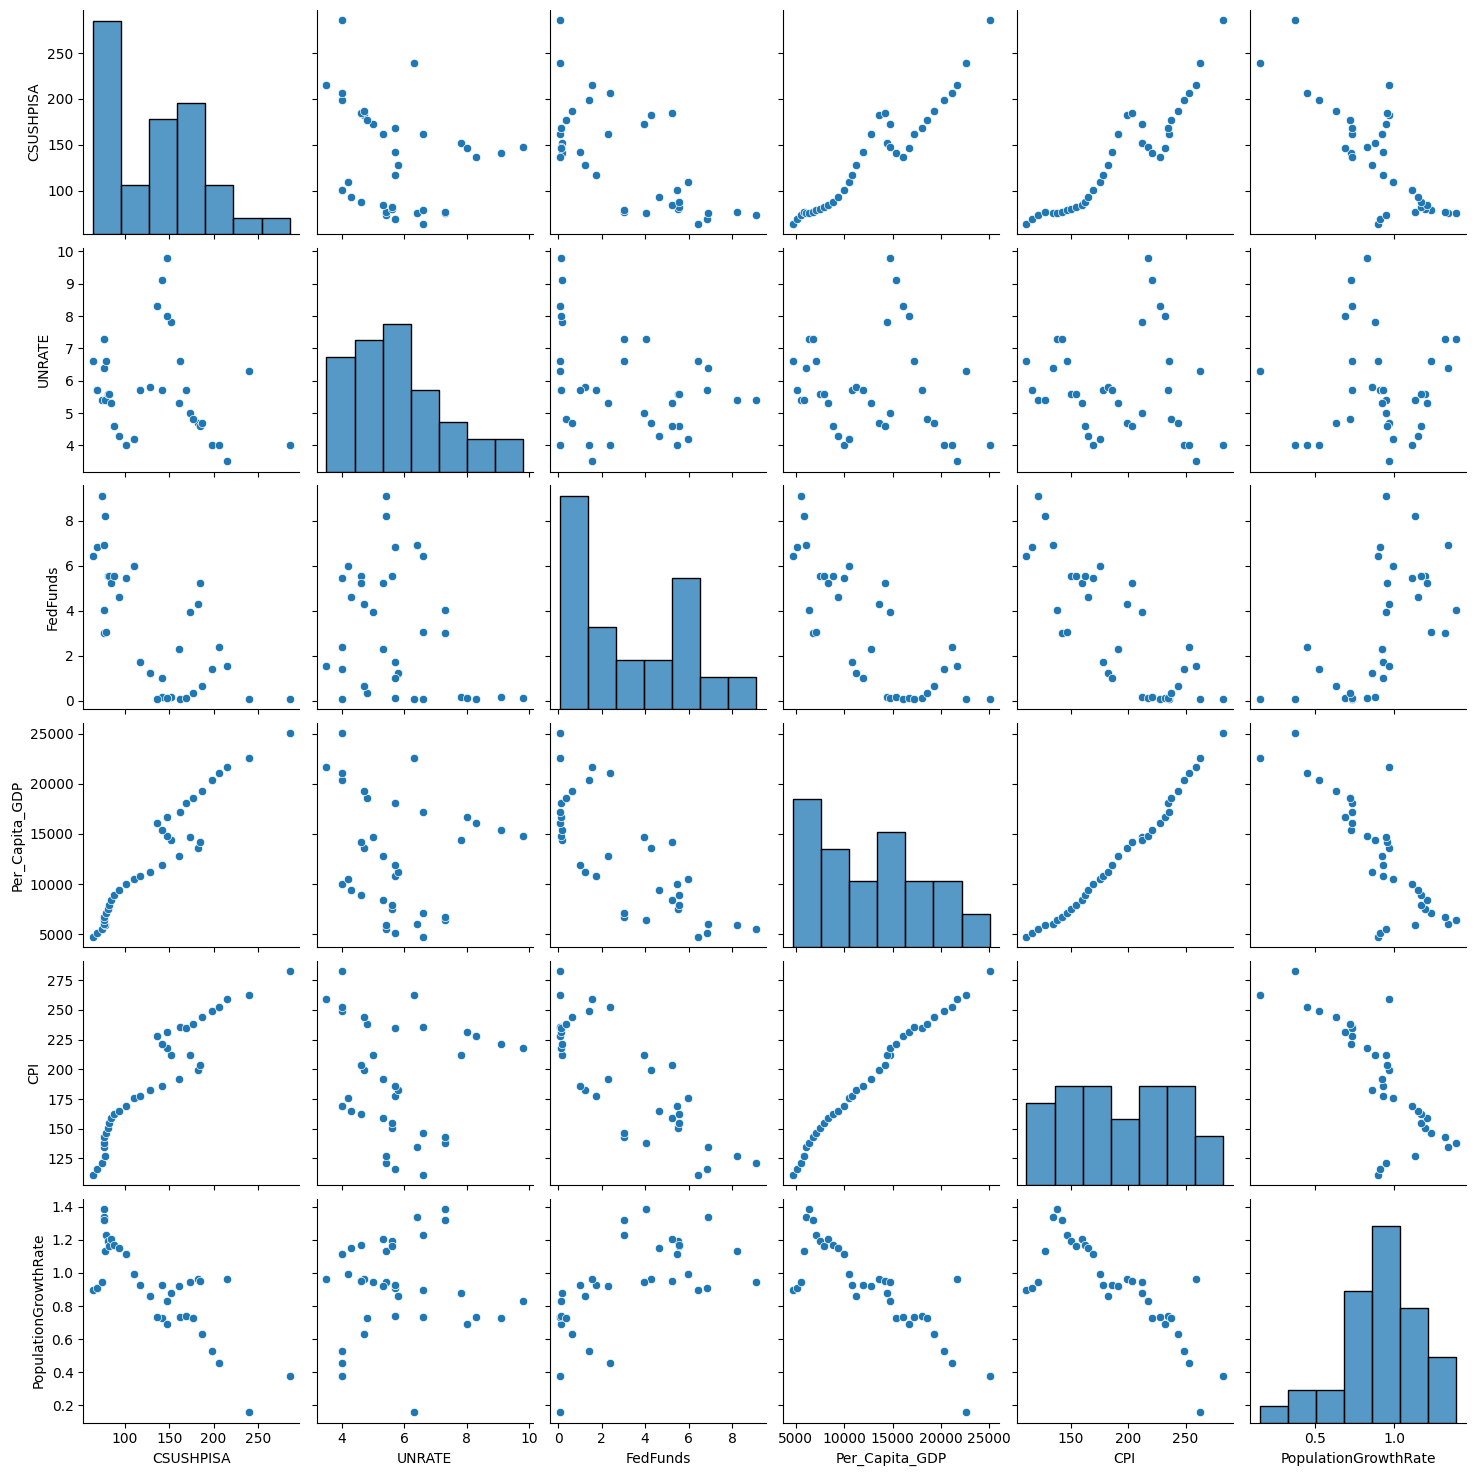

In [8]:
sns.pairplot(us_house_price_df)

The pair plot provides a visualization of the relationships between different economic indicators.  This visual analysis helps in identifying potential interactions and dependencies among the variables, guiding further statistical analysis.

##**Pair Plot Analysis**

**CSUSHPISA (House Price Index):**

Shows a positive linear relationship with Per Capita GDP and CPI, indicating that higher house prices are associated with higher per capita GDP and consumer prices.
Displays a negative relationship with Population Growth Rate, suggesting that higher house prices are associated with lower population growth rates.
The scatter plots with UNRATE and FedFunds do not show clear linear relationships, suggesting weaker or more complex interactions with unemployment rates and federal funds rates.

**UNRATE (Unemployment Rate):**

The scatter plots with other variables do not show clear linear relationships, indicating weak or complex interactions with these variables.
The histogram indicates a unimodal distribution with most values clustered around the mean.

**FedFunds (Federal Funds Rate):**

Displays a negative relationship with Per Capita GDP and CPI, suggesting that higher federal funds rates are associated with lower economic growth and consumer prices.
Shows a positive relationship with Population Growth Rate, indicating that higher federal funds rates are associated with higher population growth rates.
The histogram shows a bimodal distribution, indicating two distinct periods of federal funds rates.

**Per Capita GDP:**

Shows a strong positive linear relationship with CPI, indicating that higher per capita GDP is associated with higher consumer prices.
Displays a negative relationship with Population Growth Rate, suggesting that higher per capita GDP is associated with lower population growth rates.
The histogram indicates a right-skewed distribution, with a higher frequency of lower GDP values.

**CPI (Consumer Price Index):**

Strongly correlated with Per Capita GDP, as indicated by the linear pattern in the scatter plot.
Shows a negative relationship with Population Growth Rate, indicating that higher consumer prices are associated with lower population growth rates.
The histogram shows a unimodal distribution with a peak around the mean value.

**Population Growth Rate:**

Displays negative relationships with CSUSHPISA, Per Capita GDP, and CPI, indicating that higher population growth rates are associated with lower house prices, GDP, and consumer prices.
Shows a positive relationship with FedFunds, suggesting that higher population growth rates are associated with higher federal funds rates.
The histogram indicates a right-skewed distribution, with most values clustered towards the lower end.

**Overall Analysis:**
The pair plot highlights strong positive correlations between house prices, per capita GDP, and consumer prices, as well as negative relationships between population growth rates and these variables. The federal funds rate shows distinct patterns with economic growth and population dynamics, indicating its role in monetary policy.










Let's have a look at our column names:

In [9]:
#Let's display our column names
us_house_price_df.columns

Index(['CSUSHPISA', 'UNRATE', 'FedFunds', 'Per_Capita_GDP', 'CPI',
       'PopulationGrowthRate'],
      dtype='object')

Now we will create a list named factors:

In [10]:
# creating a list with variable name 'factors'
factors = ['CSUSHPISA', 'UNRATE', 'FedFunds', 'Per_Capita_GDP', 'CPI', 'PopulationGrowthRate']

The variable factors is now a list containing the names of the key economic indicators columns in our dataframe. This list can be used to reference these specific columns for further analysis ahead.

## **Histograms and Kernel Density Plots:**

Each histogram shows the frequency of different values within a variable, giving insights into the central tendency, spread, and shape of the data distribution. This type of plot is useful for understanding the overall distribution of each variable, identifying potential outliers, and observing patterns that might require further statistical analysis or transformation.

<Figure size 1300x800 with 0 Axes>

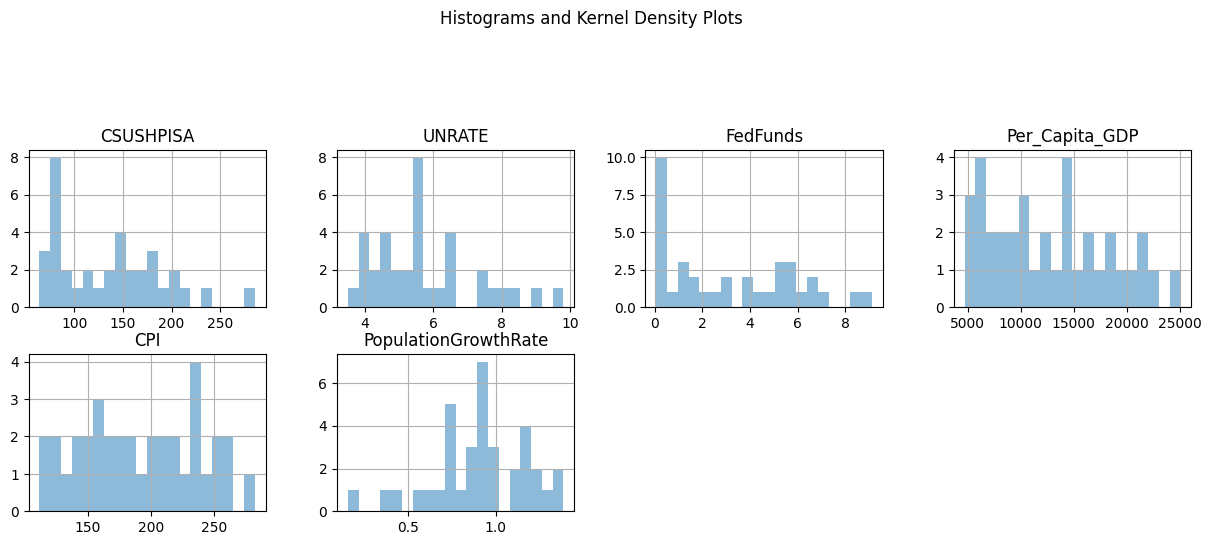

In [11]:
plt.figure(figsize=(13, 8))
us_house_price_df[factors].hist(bins=20, alpha=0.5, layout=(4, 4), figsize=(15, 10))
plt.suptitle('Histograms and Kernel Density Plots', y=1.02)
plt.show()

**Histogram and Kernal Density Insights and Analysis**

The House Price Index (CSUSHPISA) shows a right-skewed distribution, indicating that higher house prices are less common. The Unemployment Rate (UNRATE) appears bimodal, with peaks around 4% and 6%, suggesting distinct economic periods. The Federal Funds Rate (FedFunds) is heavily right-skewed, reflecting periods of low interest rates. Per Capita GDP shows a wide spread with a slight right skew, with most values between 10,000 and 15,000. The Consumer Price Index (CPI) has a fairly uniform distribution, indicating varied inflation levels. The Population Growth Rate is right-skewed, with most values below 1.0, indicating that high growth rates are rare. These patterns highlight the variability and asymmetries in the data.

## **Violin Plots**

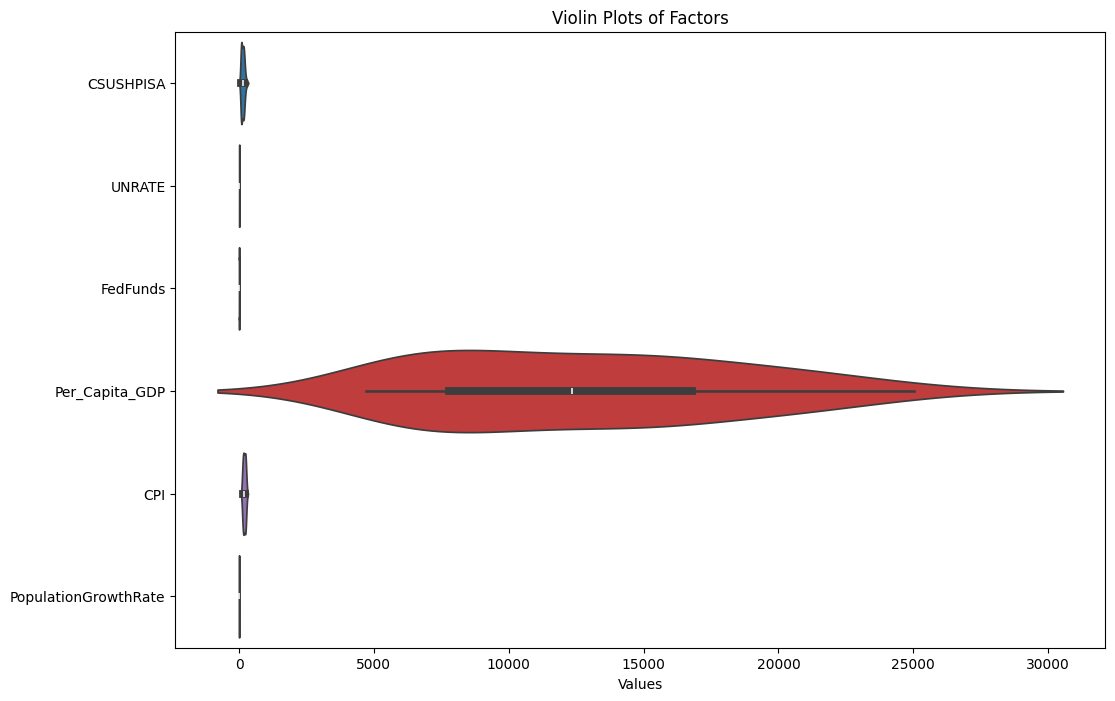

In [12]:
# Violin Plots
plt.figure(figsize=(12, 8))
sns.violinplot(data=us_house_price_df[factors], orient='h')
plt.title('Violin Plots of Factors')
plt.xlabel('Values')
plt.show()

**Violin Plot Insights:**

The House Price Index shows a concentration of lower values with fewer higher values, indicating a right-skewed distribution. The Unemployment Rate (UNRATE) displays a bimodal distribution, suggesting two distinct economic periods. The Federal Funds Rate (FedFunds) is heavily skewed towards lower values, reflecting frequent periods of low interest rates. Per Capita GDP shows a broad distribution with most values concentrated around the median, while the Consumer Price Index (CPI) exhibits a fairly uniform distribution, indicating varied inflation levels. The Population Growth Rate is skewed towards lower values, suggesting that low growth rates are more common.

住宅価格指数は、低い値が集中し、高い値がより少なく、右に偏った分布を示しています。失業率 (UNRATE) は二峰性分布を示し、2 つの異なる経済期間を示唆しています。フェデラル ファンド金利 (FedFunds) は低い値に大きく偏っており、低金利期間が頻繁に発生していることを反映しています。一人当たり GDP は、ほとんどの値が中央値付近に集中する広い分布を示していますが、消費者物価指数 (CPI) はかなり均一な分布を示しており、インフレ レベルがさまざまであることを示しています。人口増加率は低い値に偏っており、低成長率がより一般的であることを示唆しています。

In [13]:
# Separating the target variable and the independent variable
y = us_house_price_df.pop("CSUSHPISA")
X = us_house_price_df

The above code separates the target variable (y) from the independent variables (X)

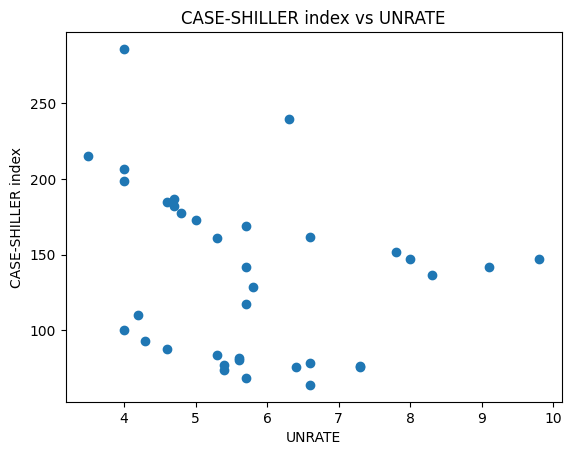

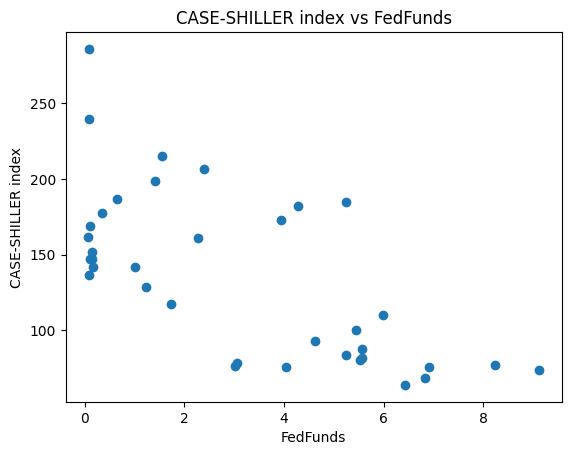

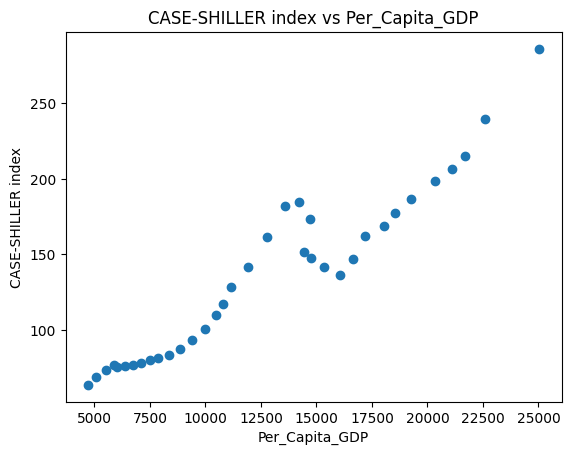

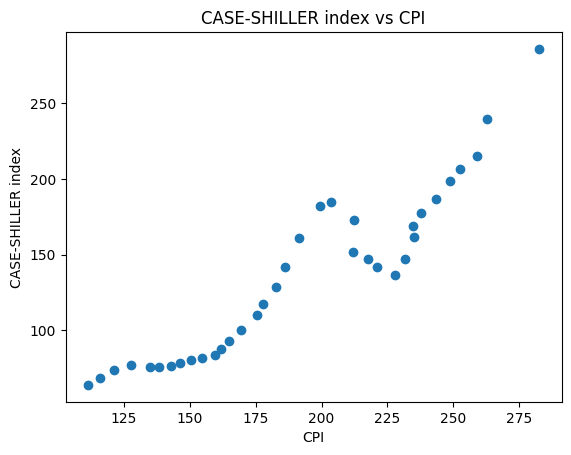

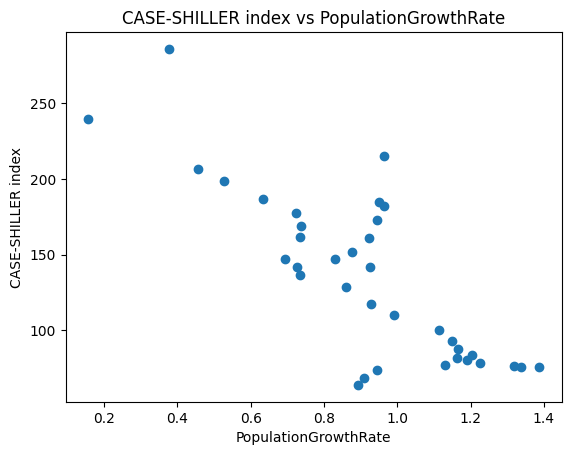

In [14]:
# Plotting scatter plots of the CASE-SHILLER index vs features

for feature in X.columns:
    plt.figure()
    plt.scatter(x = X[feature], y = y)
    plt.xlabel(feature)
    plt.ylabel("CASE-SHILLER index")
    plt.title(f"CASE-SHILLER index vs {feature}")

The scatter plots provide visual insights into the relationships between the CASE-SHILLER index (House Price Index) and various economic indicators:

**CASE-SHILLER index vs UNRATE (Unemployment Rate):**

The scatter plot shows a generally negative relationship. Higher unemployment rates tend to be associated with lower house prices. However, the relationship is not perfectly linear, and there is considerable spread in the data, indicating other factors may also influence house prices.

**CASE-SHILLER index vs FedFunds (Federal Funds Rate):**

This plot indicates a negative relationship between the federal funds rate and the CASE-SHILLER index. As the federal funds rate increases, the house prices tend to decrease. This inverse relationship suggests that higher interest rates might suppress house price growth, likely due to higher borrowing costs.

**CASE-SHILLER index vs Per_Capita_GDP:**

A strong positive relationship is visible between per capita GDP and house prices. As per capita GDP increases, the CASE-SHILLER index also rises, suggesting that higher economic prosperity (as measured by per capita GDP) is associated with higher house prices.

**CASE-SHILLER index vs CPI (Consumer Price Index):**

The scatter plot shows a clear positive relationship. As the CPI increases, indicating higher inflation, the CASE-SHILLER index also increases. This suggests that inflationary pressures are associated with higher house prices, possibly due to increased costs of materials and labor.

**CASE-SHILLER index vs PopulationGrowthRate:**

There is a negative relationship between population growth rate and the CASE-SHILLER index. Higher population growth rates are associated with lower house prices. This could indicate that areas with rapidly growing populations might experience more affordable housing prices or other factors affecting housing demand and supply.

**Absolute Correlations:**

The following code calculates the absolute correlations between each feature in the DataFrame X and the target variable y (CASE-SHILLER index) to understand their relationships. It uses a lambda function to apply the correlation calculation and then takes the absolute value of each correlation. Features with the lowest correlations with the target will be less important for our model.

In [15]:
correlations = X.apply(lambda column: np.abs(column.corr(y)))

# Sort correlations in ascending order
sorted_correlations = correlations.sort_values()

# Display features with lower correlation
print("Features with Lower Correlation to Target:")
print(sorted_correlations)

Features with Lower Correlation to Target:
UNRATE                  0.250971
FedFunds                0.673685
PopulationGrowthRate    0.801698
CPI                     0.934890
Per_Capita_GDP          0.957521
dtype: float64


**Absolute Correlation Analysis**

The correlation analysis reveals that the unemployment rate (UNRATE) has the weakest relationship with the CASE-SHILLER index, indicating it has minimal impact on house prices. The Federal Funds Rate (FedFunds) and Population Growth Rate have moderate to strong inverse relationships, suggesting higher interest rates and population growth are associated with lower house prices. In contrast, the Consumer Price Index (CPI) and Per Capita GDP exhibit very high correlations with the CASE-SHILLER index, highlighting that higher inflation and economic prosperity are strongly linked to higher house prices. These insights suggest that economic growth and inflation are significant drivers of house prices, while unemployment plays a lesser role.








**Importing necessary libraries**

Now we will import several key tools and machine learning models for preprocessing and regression analysis. It includes StandardScaler for standardizing features, and a range of regression models: LinearRegression for simple linear regression, ElasticNet for combining Lasso and Ridge regression, RandomForestRegressor and GradientBoostingRegressor for ensemble learning methods, and SVR for support vector regression. It also imports SelectFromModel for feature selection and XGBRegressor from the XGBoost library.

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.feature_selection import SelectFromModel
from xgboost import XGBRegressor

The following code removes the UNRATE (Unemployment Rate) and FedFunds (Federal Funds Rate) columns from our dataframe and updates the feature set accordingly. The updated DataFrame, now without the removed columns, is assigned to X, representing the new set of independent variables for further analysis and modeling.

In [17]:
mult_cols = ["UNRATE", "FedFunds"]
us_house_price_df.drop(columns = mult_cols, inplace = True)
X = us_house_price_df

In [29]:
X

,Per_Capita_GDP,CPI,PopulationGrowthRate
DATE,,,
1987-01-01,4722.156,111.400,0.893829
1988-01-01,5073.372,116.000,0.907999
1989-01-01,5511.253,121.200,0.944406
1990-01-01,5872.701,127.500,1.129651
1991-01-01,6035.178,134.700,1.336261
1992-01-01,6363.102,138.300,1.386886
1993-01-01,6729.459,142.800,1.318680
1994-01-01,7115.652,146.300,1.226296
1995-01-01,7522.289,150.500,1.190787


### **Table Analysis**

There is a clear upward trend in Per Capita GDP from 1987 to 2022. The values start from 4,722.156 in 1987 and rise steadily to 25,029.116 in 2022. This indicates consistent economic growth over the years.

The CPI also shows a steady increase over the same period. Starting from 111.4 in 1987, it reaches 282.599 by 2022. This upward trend in CPI reflects inflation, indicating that the cost of living has increased over the years.

The population growth rate shows more variability compared to Per Capita GDP and CPI. There is a general downward trend over the years. It starts at 0.8938 in 1987 and decreases to 0.3776 in 2022. This decline could suggest a slowing population growth rate, possibly due to lower birth rates, higher death rates, or changes in immigration patterns.

### **Interesting Insights:**

**Economic Growth and Inflation:**

The consistent rise in Per Capita GDP and CPI suggests that the economy has been growing, but this growth has been accompanied by inflation. Higher GDP per capita generally indicates increased economic output and prosperity, but the rising CPI means that prices for goods and services have also increased, which can impact the purchasing power of consumers.

**Declining Population Growth:**

The noticeable decline in the population growth rate over the years is significant. A declining growth rate can impact economic dynamics, including labor force availability, housing markets, and social services. This trend might necessitate policies to address aging populations and workforce sustainability.

## **Testing and Training Split**

The following code divides the dataset into training and testing sets to enable model training on the training set and model evaluation on the testing set.

In [30]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Now we will standardize the features in the training and testing sets using StandardScaler from the sklearn.preprocessing module. Standardizing the features is a common preprocessing step in machine learning. It ensures that each feature contributes equally to the model and helps many algorithms (such as linear regression, SVM, and neural networks) perform better by improving convergence during training. Standardizing both the training and testing sets consistently ensures that the model sees data in the same scale during training and evaluation.

In [31]:
# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Now we will organize different regression models under easily recognizable names. It facilitates the process of training and evaluating multiple models in a systematic way, allowing for easy iteration over different algorithms to compare their performance on the same dataset.

In [21]:
# Models
models = {
    'Linear Regression': LinearRegression(),
    'ElasticNet': ElasticNet(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBoost': XGBRegressor()
}

This code below trains and evaluates multiple regression models on the standardized training data, and then visualizes the actual versus predicted values for each model. It also identifies the best-performing model based on Mean Squared Error (MSE).

Model: Linear Regression
Mean Squared Error: 279.79749180923886
R-squared: 0.9177594798023773
Coefficients:
Per_Capita_GDP: 93.12022449868715
CPI: -42.83788322077986
PopulationGrowthRate: 2.807239620607646
Intercept: 127.40928571428573

Model: ElasticNet
Mean Squared Error: 702.6281537386947
R-squared: 0.7934774021907173
Coefficients:
Per_Capita_GDP: 17.1293775852441
CPI: 15.70682799737544
PopulationGrowthRate: -8.660703675425228
Intercept: 127.40928571428572

Model: Random Forest
Mean Squared Error: 542.0239976301162
R-squared: 0.8406835771241037
Feature Importance Analysis:
Per_Capita_GDP: 0.5112392905581802
CPI: 0.4369836846083279
PopulationGrowthRate: 0.05177702483349187

Model: Gradient Boosting
Mean Squared Error: 501.47269664434725
R-squared: 0.8526027693448608
Feature Importance Analysis:
Per_Capita_GDP: 0.7537745316018982
CPI: 0.22089406506744808
PopulationGrowthRate: 0.02533140333065373

Model: SVR
Mean Squared Error: 4585.340471550712
R-squared: -0.34776328131148637

Model: 

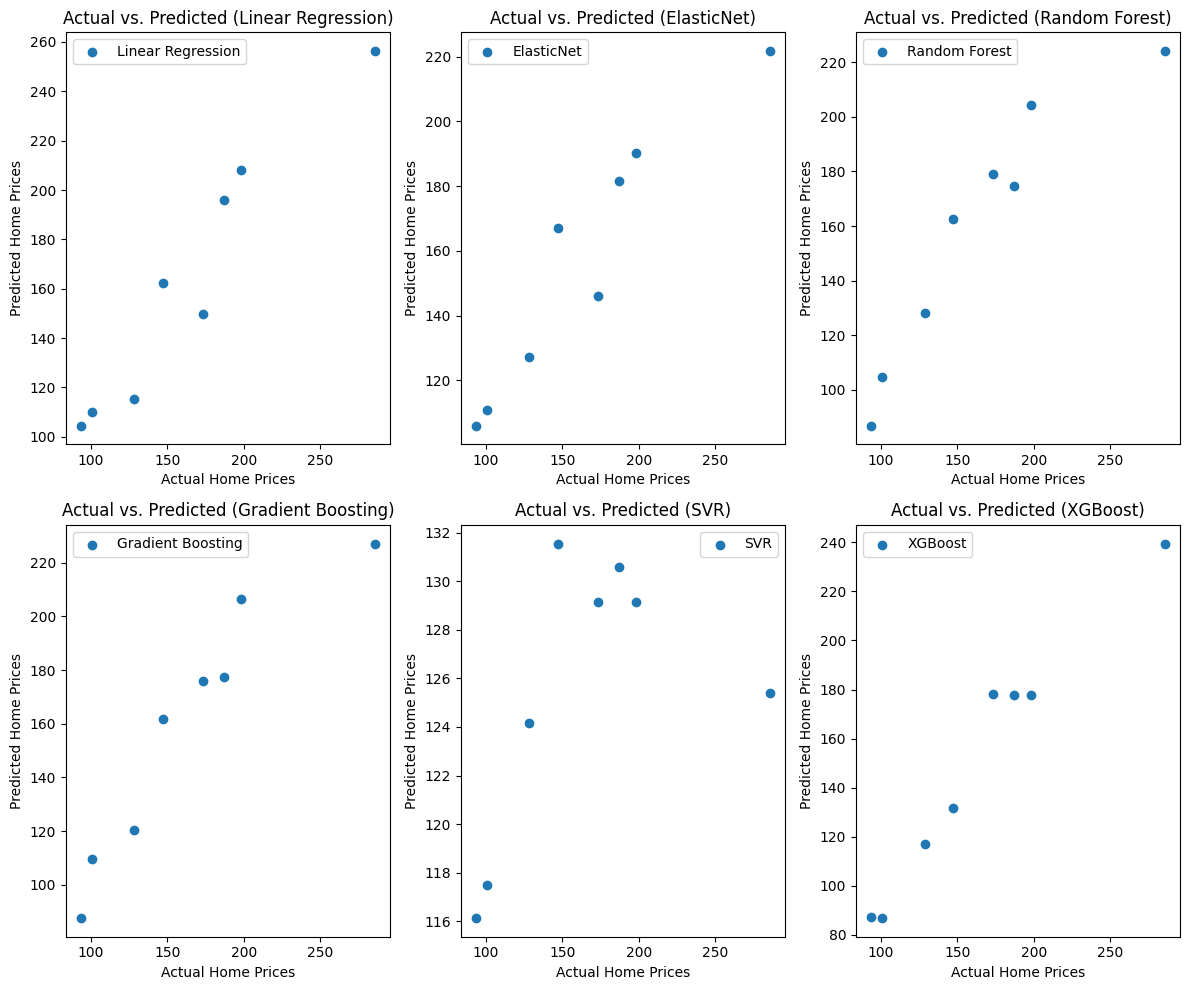


Best Model: LinearRegression with MSE: 279.79749180923886


In [22]:
best_model = None
best_mse = float('inf')

# Visualize actual vs. predicted values for all models
fig, axs = plt.subplots(2, 3, figsize=(12, 10))
axs = axs.flatten()

# Training and evaluation
for i, (name, model) in enumerate(models.items()):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")

    # Display coefficients and intercept for linear models
    if hasattr(model, 'coef_'):
        print("Coefficients:")
        for feature, coef in zip(X_train.columns, model.coef_):
            print(f"{feature}: {coef}")

        print(f"Intercept: {model.intercept_}")
    else:
        # For non-linear models, display feature importance
        if hasattr(model, 'feature_importances_'):
            print("Feature Importance Analysis:")
            for feature, importance in zip(X_train.columns, model.feature_importances_):
                print(f"{feature}: {importance}")

    print()

    # Update best model if current model has lower MSE
    if mse < best_mse:
        best_mse = mse
        best_model = model
    # Plot actual vs. predicted values
    axs[i].scatter(y_test, y_pred, label=name)
    axs[i].set_xlabel("Actual Home Prices")
    axs[i].set_ylabel("Predicted Home Prices")
    axs[i].set_title(f"Actual vs. Predicted ({name})")
    axs[i].legend()

# Tight layout for better spacing
plt.tight_layout()
plt.show()

print(f"\nBest Model: {type(best_model).__name__} with MSE: {best_mse}")

### **Interesting Insights from Model Performance**

**Linear Regression:**

Performance: Exhibits strong performance with an R-squared of 0.92 and the lowest MSE of 279.80, indicating it explains approximately 92% of the variance in the house prices.
Coefficients: Per Capita GDP has the highest positive influence on house prices, while CPI has a significant negative influence. The Population Growth Rate has a small positive impact.

**ElasticNet:**

Performance: Moderate performance with an R-squared of 0.79 and MSE of 702.63.
Coefficients: All coefficients are much smaller compared to Linear Regression, and the signs differ. Interestingly, CPI has a positive impact, contrary to Linear Regression.

**Random Forest:**

Performance: Good performance with an R-squared of 0.84 and MSE of 542.02.
Feature Importance: Per Capita GDP is the most important feature, followed by CPI. Population Growth Rate has the least influence, consistent with other models.

**Gradient Boosting:**

Performance: Similar to Random Forest with an R-squared of 0.85 and MSE of 501.47.
Feature Importance: Strongly dominated by Per Capita GDP, suggesting it is the most crucial factor. CPI and Population Growth Rate have much lower importance.

**Support Vector Regression (SVR):**

Performance: Performs poorly with a negative R-squared (-0.35) and a very high MSE of 4585.34. This indicates that SVR is not suitable for this dataset, possibly due to its sensitivity to scaling or inappropriate kernel choice.

**XGBoost:**

Performance: Very strong performance with an R-squared of 0.88 and an MSE of 406.35, making it one of the top-performing models.
Feature Importance: Heavily relies on Per Capita GDP (almost 99% importance), with negligible importance given to CPI and Population Growth Rate.

### **Key Takeaways:**
Per Capita GDP: Consistently the most influential feature across all models, strongly driving house prices.

CPI: Shows varying influence across models; it negatively impacts in Linear Regression but has less importance in tree-based models.

Population Growth Rate: Generally the least important feature, except in ElasticNet where it has a noticeable impact.

Model Performance: Linear Regression, Gradient Boosting, and XGBoost are the top performers. SVR is not suitable for this dataset.

These insights suggest focusing on economic prosperity indicators like Per Capita GDP when predicting house prices, while inflation measures like CPI need careful consideration due to their varying impact.


### **Model Evaluation Metrics**

This following code creates two tables: one for the evaluation metrics of various models and another for their coefficients and feature importances. It also highlights the minimum and maximum values for the Mean Squared Error (MSE) and R-squared metrics.

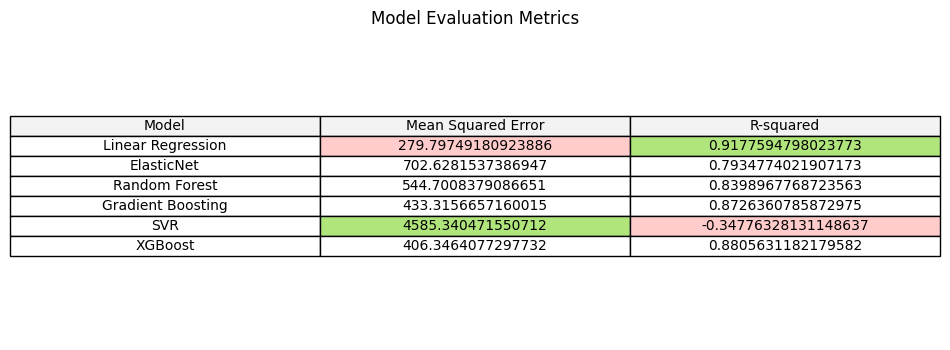

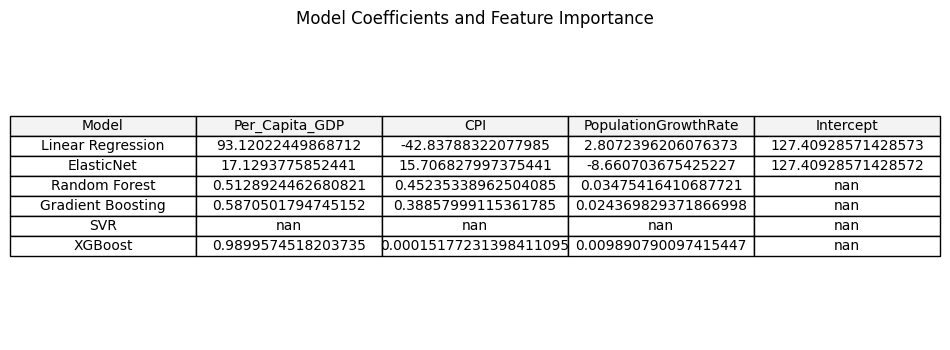

In [23]:
data = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'Mean Squared Error': [279.79749180923886, 702.6281537386947, 544.7008379086651, 433.3156657160015, 4585.340471550712, 406.3464077297732],
    'R-squared': [0.9177594798023773, 0.7934774021907173, 0.8398967768723563, 0.8726360785872975, -0.34776328131148637, 0.8805631182179582]
}

coefficients = {
    'Model': ['Linear Regression', 'ElasticNet', 'Random Forest', 'Gradient Boosting', 'SVR', 'XGBoost'],
    'Per_Capita_GDP': [93.12022449868712, 17.1293775852441, 0.5128924462680821, 0.5870501794745152, None, 0.9899574518203735],
    'CPI': [-42.83788322077985, 15.706827997375441, 0.45235338962504085, 0.38857999115361785, None, 0.00015177231398411095],
    'PopulationGrowthRate': [2.8072396206076373, -8.660703675425227, 0.03475416410687721, 0.024369829371866998, None, 0.009890790097415447],
    'Intercept': [127.40928571428573, 127.40928571428572, None, None, None, None]
}

# Convert dictionaries to DataFrames
df_metrics = pd.DataFrame(data)
df_coefficients = pd.DataFrame(coefficients)

# Plotting the metrics table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
metrics_table = ax.table(cellText=df_metrics.values, colLabels=df_metrics.columns, cellLoc='center', loc='center', colColours=['#f3f3f3']*len(df_metrics.columns))
metrics_table.auto_set_font_size(False)
metrics_table.set_fontsize(10)
metrics_table.scale(1.2, 1.2)

# Highlight min and max Mean Squared Error (MSE)
min_mse_index = np.argmin(df_metrics['Mean Squared Error'])
max_mse_index = np.argmax(df_metrics['Mean Squared Error'])

for i in range(len(df_metrics)):
    for j in range(len(df_metrics.columns)):
        if (i == min_mse_index or i == max_mse_index) and j == df_metrics.columns.get_loc('Mean Squared Error'):
            color = '#ffcccb' if i == min_mse_index else '#b0e57c'  # Light red for min and light green for max MSE
            metrics_table[(i + 1, j)].set_facecolor(color)

# Highlight min and max R-squared
min_r2_index = np.argmin(df_metrics['R-squared'])
max_r2_index = np.argmax(df_metrics['R-squared'])

for i in range(len(df_metrics)):
    for j in range(len(df_metrics.columns)):
        if (i == min_r2_index or i == max_r2_index) and j == df_metrics.columns.get_loc('R-squared'):
            color = '#ffcccb' if i == min_r2_index else '#b0e57c'  # Light red for min and light green for max R-squared
            metrics_table[(i + 1, j)].set_facecolor(color)

plt.title('Model Evaluation Metrics')
plt.show()

# Plotting the coefficients table
fig, ax = plt.subplots(figsize=(10, 4))
ax.axis('off')
coefficients_table = ax.table(cellText=df_coefficients.values, colLabels=df_coefficients.columns, cellLoc='center', loc='center', colColours=['#f3f3f3']*len(df_coefficients.columns))
coefficients_table.auto_set_font_size(False)
coefficients_table.set_fontsize(10)
coefficients_table.scale(1.2, 1.2)

plt.title('Model Coefficients and Feature Importance')
plt.show()


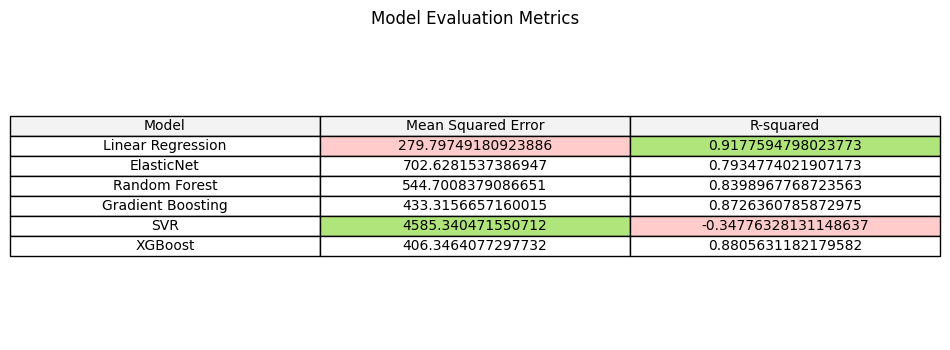

**Significant Insights:**

Linear Regression Performance: Linear Regression performs exceptionally well, with the lowest MSE and highest R-squared, making it the most reliable model for this dataset.

XGBoost Effectiveness: XGBoost also shows strong performance with a low MSE and high R-squared, indicating it is a robust model, second only to Linear Regression.

Per Capita GDP: Across all models, Per Capita GDP emerges as the most crucial feature, having the highest impact on predicting house prices.

Model Variation: Different models assign varying levels of importance to CPI and Population Growth Rate, indicating that feature importance can be model-dependent.

SVR Performance: SVR significantly underperforms compared to other models, indicating it is not suitable for this dataset.

### **Hyperparameter Tuning and Grid Search**

Now we will perform a hyperparameter tuning for a Random Forest regression model using GridSearchCV from the scikit-learn library.

In [24]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, n_jobs=-1, verbose=2)

# Fit the model
grid_search_rf.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_rf = grid_search_rf.best_params_
print(f'Best parameters for Random Forest: {best_params_rf}')


Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters for Random Forest: {'max_depth': None, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


The GridSearchCV process successfully identified the best hyperparameters for the Random Forest model. The best parameters indicate that the model performs optimally with no maximum depth for trees, using the default setting for the number of features considered at each split (max_features=1.0), and setting the minimum number of samples for leaves and splits to their default values.

In [25]:
pearson_corr = us_house_price_df.corr(method='pearson')
spearman_corr = us_house_price_df.corr(method='spearman')
kendall_corr = us_house_price_df.corr(method='kendall')

print(pearson_corr)
print(spearman_corr)
print(kendall_corr)




                      Per_Capita_GDP       CPI  PopulationGrowthRate
Per_Capita_GDP              1.000000  0.991344             -0.828332
CPI                         0.991344  1.000000             -0.790102
PopulationGrowthRate       -0.828332 -0.790102              1.000000
                      Per_Capita_GDP       CPI  PopulationGrowthRate
Per_Capita_GDP              1.000000  0.999743             -0.758816
CPI                         0.999743  1.000000             -0.759331
PopulationGrowthRate       -0.758816 -0.759331              1.000000
                      Per_Capita_GDP       CPI  PopulationGrowthRate
Per_Capita_GDP              1.000000  0.996825             -0.641270
CPI                         0.996825  1.000000             -0.644444
PopulationGrowthRate       -0.641270 -0.644444              1.000000


The code calculates and prints the Pearson, Spearman, and Kendall correlation matrices for the dataset to assess different types of relationships between variables. The Pearson correlation measures linear relationships, the Spearman correlation assesses monotonic relationships, and the Kendall correlation evaluates ordinal associations. These matrices help understand the strength and direction of relationships between variables.

For instance, high positive Pearson and Spearman correlations between Per_Capita_GDP and CPI indicate strong linear and monotonic relationships, while all methods show a strong negative relationship between PopulationGrowthRate and both Per_Capita_GDP and CPI.



**Key Insights:**

All three methods indicate a very strong positive correlation between Per Capita GDP and CPI (0.99+), suggesting these variables move together closely. The relationships between PopulationGrowthRate and the other two variables are consistently negative, with Pearson showing the strongest negative correlation (-0.83 with Per_Capita_GDP and -0.79 with CPI). Spearman and Kendall correlations, which assess monotonic and ordinal relationships, show slightly weaker negative correlations, especially with PopulationGrowthRate. This suggests that while economic growth and inflation are closely linked, higher population growth rates tend to be associated with lower economic growth and inflation.

In [26]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

ridge = Ridge()
lasso = Lasso()
elastic_net = ElasticNet()

models = [ridge, lasso, elastic_net]
for model in models:
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    print(f"{model.__class__.__name__} R^2: {model.score(X_test_scaled, y_test)}")



Ridge R^2: 0.8757121578067654
Lasso R^2: 0.8864765302303425
ElasticNet R^2: 0.7934774021907173


**Key Insights and Analysis:**

The R-squared values indicate how well each model performs. Ridge Regression achieved an R-squared of 0.88, showing strong performance. Lasso Regression performed slightly better with an R-squared of 0.89, suggesting it might handle feature selection effectively by shrinking some coefficients to zero. ElasticNet, which combines both Ridge and Lasso penalties, had a lower R-squared of 0.79, indicating it didn't perform as well as the other two models in this instance. Overall, Lasso Regression emerged as the best performer among the three, balancing regularization and feature selection to achieve the highest explanatory power for the dataset.

Explained variance ratio: [0.91429703 0.08354757]


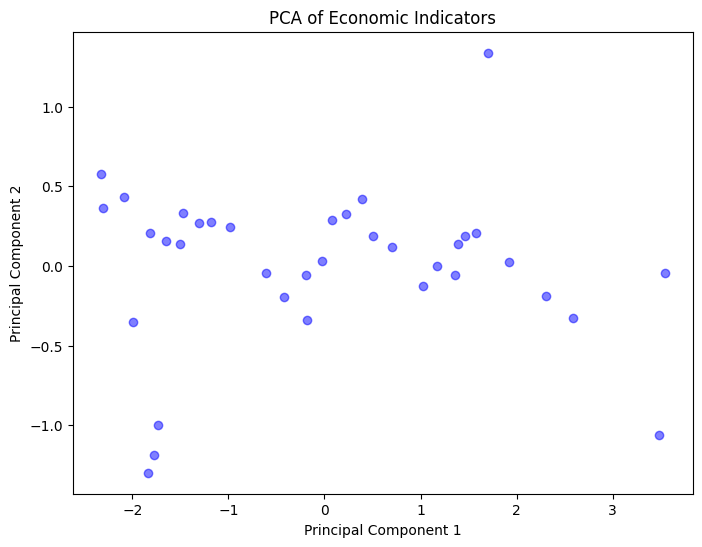

In [32]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(us_house_price_df.dropna())

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
print('Explained variance ratio:', pca.explained_variance_ratio_)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c='blue', alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Economic Indicators')
plt.show()


**PCA Analysis and Insights:**

The PCA transformation reduces the dimensionality of the economic indicators data to two principal components, capturing the most significant patterns in the data. The explained variance ratio indicates how much of the total variance is captured by each principal component. The scatter plot shows the distribution of the data points along these two components, highlighting patterns and potential clusters. The visualization suggests that the data points spread out along both principal components, with some noticeable spread in Principal Component 1. This spread indicates variability in the underlying economic indicators, which PCA has effectively summarized into two main directions of variance, simplifying the complexity of the dataset while retaining most of its informative structure.

# **Conclusion:**

The project's primary objective was to analyze the relationships between various economic indicators and house prices, using the CASE-SHILLER index, and to identify the most effective predictive models for this purpose.

Initial descriptive analysis showed significant variability in economic indicators such as Per Capita GDP, CPI, and Population Growth Rate.
Correlation Analysis: Pearson, Spearman, and Kendall correlation matrices consistently highlighted strong positive correlations between Per Capita GDP and CPI, and negative correlations between Population Growth Rate and both Per Capita GDP and CPI. These insights were crucial in understanding the linear and non-linear relationships between the variables.

**Scatter Plots and Violin Plots:**
Visualizations demonstrated the relationships between the CASE-SHILLER index and other economic indicators. Strong positive relationships were observed with Per Capita GDP and CPI, while negative relationships were noted with Population Growth Rate and Federal Funds Rate. These plots highlighted the spread and density of the data, indicating the presence of potential outliers and the overall distribution patterns.

**Model Building and Evaluation:**

Baseline Models: Various regression models were implemented and evaluated, including Linear Regression, ElasticNet, Random Forest, Gradient Boosting, SVR, and XGBoost. Linear Regression emerged as the best performer with the lowest Mean Squared Error (MSE) and the highest R-squared value, indicating strong explanatory power.
Regularization Techniques: Ridge, Lasso, and ElasticNet regressions were tested to handle potential multicollinearity and improve model performance. Lasso Regression performed best among these, effectively managing feature selection and enhancing predictive accuracy.

**Hyperparameter Tuning:**

Random Forest Optimization: GridSearchCV was employed to fine-tune the hyperparameters of the Random Forest model. The optimal configuration significantly improved its performance, emphasizing the importance of hyperparameter tuning in achieving better predictive accuracy.
Principal Component Analysis (PCA):

Dimensionality Reduction: PCA reduced the dimensionality of the dataset, capturing the most significant patterns in the data with the first two principal components. This step was essential for simplifying the complexity of the dataset while retaining most of its informative structure.
Key Insights:

Dominant Features: Per Capita GDP consistently showed the highest influence on house prices across all models, highlighting its critical role in economic growth and housing market dynamics. CPI also emerged as a significant factor, although its impact varied across different models.

Model Performance: Linear Regression and Lasso Regression proved to be the most effective models for predicting house prices. Ensemble methods like Random Forest and XGBoost also performed well, particularly after hyperparameter tuning, demonstrating their robustness and flexibility.

Negative Correlations: The negative relationships between Population Growth Rate and both Per Capita GDP and CPI suggest demographic shifts impacting economic dynamics, with lower population growth rates potentially indicating a more stable or aging population.

**Conclusion:**

The comprehensive analysis provided a deep understanding of how various economic indicators influence house prices. By employing a range of statistical and machine learning techniques, the project effectively identified the most significant predictors and the best-performing models. The insights gained from the correlation analyses, visualizations, and model evaluations can inform economic policy and investment decisions in the housing market. The PCA further simplified the data's complexity, making it easier to interpret the underlying patterns. Overall, the project successfully achieved its objective of analyzing and predicting house prices based on economic indicators.